# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [8]:
#make the dataset
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4,n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

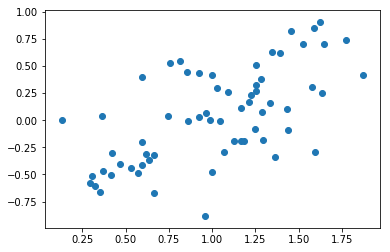

In [9]:
#plot y,x1
plt.scatter(x.T[0],y)

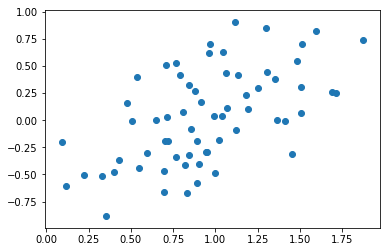

In [10]:
#plot y,x2
plt.scatter(x.T[1],y)

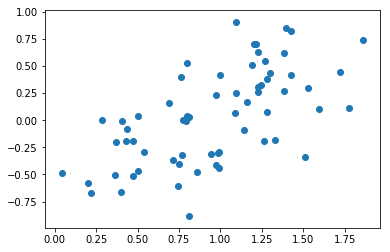

In [11]:
#plot y,x3
plt.scatter(x.T[2],y)

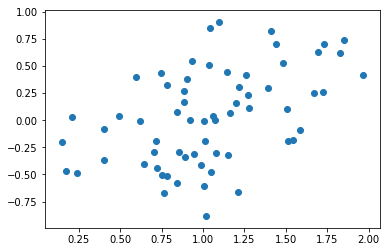

In [15]:
#plot y,x4
plt.scatter(x.T[3],y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [16]:
left = np.linalg.inv(np.dot(x.T,x))

In [18]:
right = np.dot(y.T, x)

In [19]:
np.dot(left, right)

array([ 3.20241053e-01,  2.75656281e-01,  2.85218671e-01, -8.06996665e-04,
       -8.20575701e-01])

In [20]:
beta = np.linalg.lstsq(x, y)[0]
beta

D:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 3.20241053e-01,  2.75656281e-01,  2.85218671e-01, -8.06996665e-04,
       -8.20575701e-01])

In [50]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

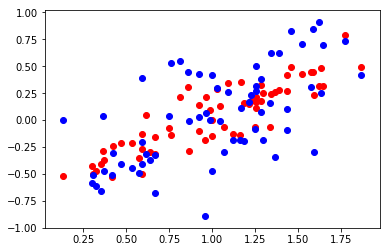

In [22]:
#plot dimension 1
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='blue')

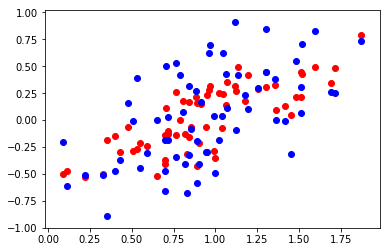

In [23]:
#plot dimension 2
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='blue')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [5]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
X = credit[['Income', 'Limit']].as_matrix()

X = np.vstack([X.T, np.ones(len(X))]).T


D:\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
Y = credit['Rating']

In [8]:
left = np.linalg.inv(np.dot(X.T, X))
right = np.dot(Y.T, X)
np.dot(left, right)
beta = np.linalg.lstsq(X, Y)[0]
pred = np.dot(X, beta)

D:\Python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

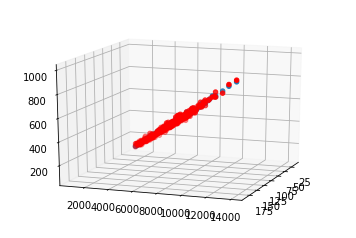

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16,20)
ax.scatter(X.T[0], X.T[1], pred, zdir='z')
ax.scatter(X.T[0], X.T[1], Y, zdir='z', c='r')

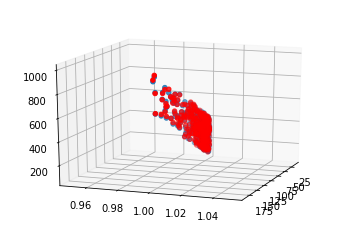

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(16,20)
ax.scatter(X.T[0], X.T[2], pred, zdir='z')
ax.scatter(X.T[0], X.T[2], Y, zdir='z', c='r')